In [44]:
library("tidyverse")

#### EXTRA

In [2]:
# prima di tutto svolgo l'esercizio "extra" che chiedeva di lavorare con le funzioni base di R

objs <- mget(ls("package:base", all = TRUE ), inherits = TRUE )
bfuns <- Filter(is.function , objs )

In [3]:
fun <- rep(0,length(bfuns))
for (i in 1:length(bfuns)) {
    fun[i] <- (length(formals(bfuns[[i]])))
}

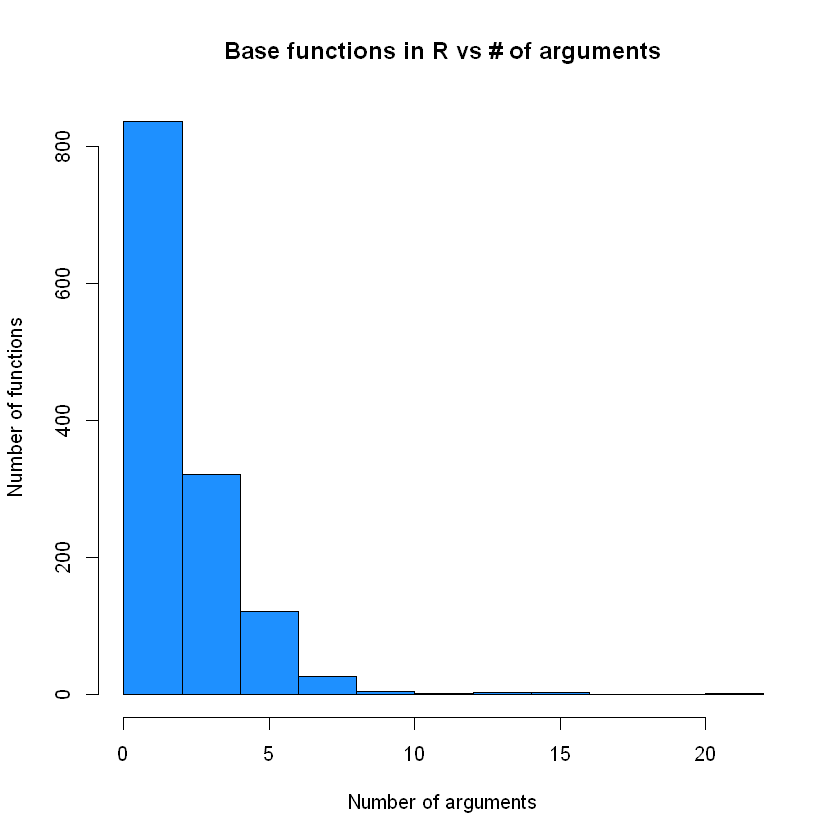

In [4]:
hist(fun, main="Base functions in R vs # of arguments", xlab="Number of arguments",ylab="Number of functions",col="dodgerblue")

## Exercise 1 
Un set di misure sono state effettuate a proposito della concentrazione di un agente contaminante all'interno di acqua di rubinetto.
La tabella che verrà costruita riporta i valori della concentrazione $x$ con la corrispondente probabilità p1 e p2 calcolate con metodi differenti.

In [5]:
x <- c(15.58,15.9,16,16.1,16.2)
p.1 <- c(0.15,0.21,0.35,0.15,0.14)
p.2 <- c(0.14,0.05,0.64,0.08,0.09)

# determino tramite la definizione il valore atteso della random variable x e la varianza 
# con le due probabilità p1 e p2
df <- data.frame(x,p.1,p.2)
df

# verifico che le due probabilità siano normalizzate a uno 
print(paste0("Total probability with p1 is = ",sum(p.1)))
print(paste0("Total probability with p2 is = ",sum(p.2)))

mu <- function(x,p) sum(x*p)
var <- function(x,p) sum((x**2)*p) - mu(x,p)**2
# definisco due funzioni mu e var che calcolano la varianza e la media per una distribuzione discreta di 
# probabilità di cui sono noti i valori sampled per ciascun sample della random variable

mu1 <- mu(x,p.1)
mu2 <- mu(x,p.2)
var1 <- var(x,p.1)
var2 <- var(x,p.2)

print(paste0("Mean value of x with p1 is = ", mu1))
print(paste0("Mean value of x with p2 is = ", mu2))
print(paste0("Variance of x with p1 is = ", var1))
print(paste0("Variance of x with p2 is = ", var2))

x,p.1,p.2
<dbl>,<dbl>,<dbl>
15.58,0.15,0.14
15.90,0.21,0.05
16.00,0.35,0.64
16.10,0.15,0.08
16.20,0.14,0.09


[1] "Total probability with p1 is = 1"
[1] "Total probability with p2 is = 1"
[1] "Mean value of x with p1 is = 15.959"
[1] "Mean value of x with p2 is = 15.9622"
[1] "Variance of x with p1 is = 0.0339790000000164"
[1] "Variance of x with p2 is = 0.0281671599999811"


## Exercise 2
Il tempo di attesa dal dottore è di circa trenta minuti e la distribuzione di tali tempi segue una probabilità esponenziale con un fattore pari a $1/30$.
Si chiede di:
- estrarre da questa distribuzione di probabilità cinquanta samples e rappresentarne un istogramma; 
- manipolare la pdf per calcolare quale sia la probabilità che una persona aspetti meno di dieci minuti;
- calcolare il valor medio di attesa a partire dai dati estratti, dalla pdf implementata in R e dalla teoria;
- trovare la probabilità di essere ricevuti dopo un'ora.

#### Random samples estratti dalla distribuzione esponenziale

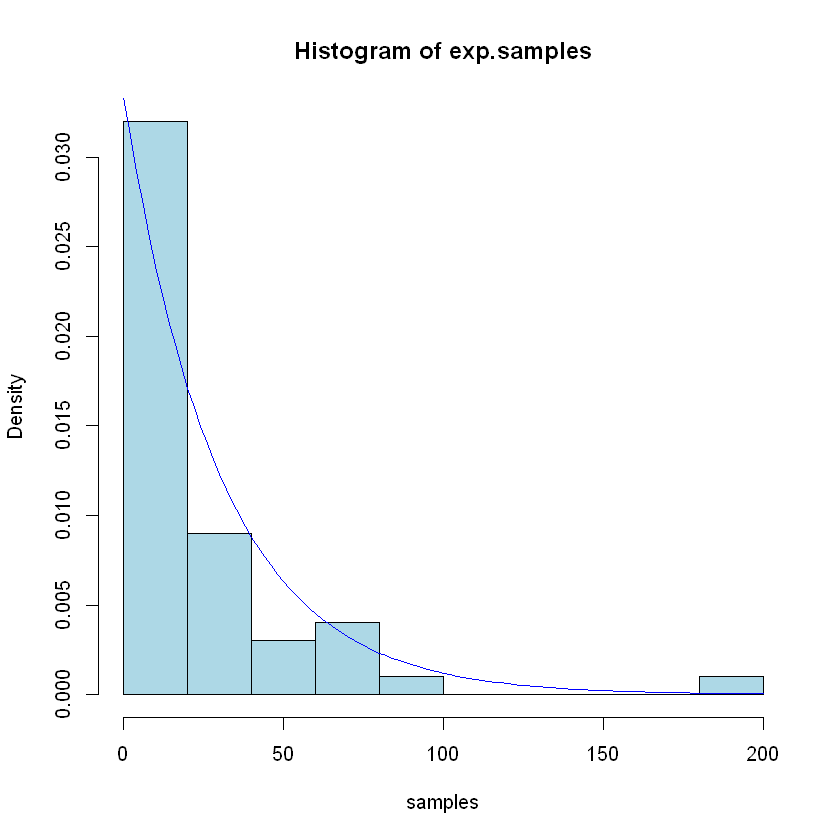

In [6]:
# estraggo quanti samples desidero tramite la funzione rexp (random samples from an exponential ditribution 
# given the decay rate)

l <- 1/30
exp.samples <- rexp(50, l)
hist(exp.samples, col="lightblue", freq=F, xlab="samples")
curve(dexp(x, rate = 1/30), add = T, col = "blue")

#### Calcolo della probabilità di aspettare meno di dieci minuti e più di un'ora

Dalla definizione di una distribuzione di probabilità $f(x)$ sappiamo che:
\begin{equation}
P(X<10) = \int_{-\infty}^{10} f(x)  \ \mathrm{d} x \\
P(X>60) = \int_{60}^{+\infty} f(x)  \ \mathrm{d} x 
\end{equation}
Essendo una distribuzione dimensionalmente una densità quando parliamo di probabilità a partire da una distribuzione continua bisogna sempre considerare una somma di valori in un intervallo finito. Non si tratta di una semplice somma in quanto bisogna moltiplicare per l'ampiezza "infinitesima" di tale intervallo di random variable affinchè il risultato sia una probabilità cioè una quantità adimensionale. Inoltre passando da una variabile random discreta ad una continua è naturale riscrivere una somma di valori assunti dalla funzione (che in quel caso è propriamente una probabilità) come un integrale di una densità in un intervallo continuo.

In [7]:
# per calcolare la probabilità che una persona aspetti meno di dieci minuti utilizzo la cdf ottenuta 
# dalla distribuzione esponenziale dato il rate l.

print(paste0("La probabilità che una persona aspetti meno di dieci minuti é = ", pexp(10,l)))

# confrontiamo questo risultato con il calcolo numerico dell'integrale della pdf nell'intervallo di tempo 
# [0,10] minuti 

pdf.exp <- function(x) l*exp(-l*x)
# poichè integrate vuole una funzione di x e non posso specificare un altro parametro essendo l'integrazione
# in una dimensione sfrutto la dichiarazione precedente del rate l come global variable.

print(paste0("La probabilità che una persona aspetti meno di dieci minuti é = ", integrate(pdf.exp,0,10)$value))

# un terzo modo che ho per calcolare questa probabilità è sfruttando la forma analitica delle cdf per una
# distribuzione esponenziale e valutarla per x = 10 minuti

cdf.exp <- function(x) 1 - exp(-l*x)
print(paste0("La probabilità che una persona aspetti meno di dieci minuti é = ", cdf.exp(10)))

# calcolo in una sola maniera la probabilità che una persona aspetti più di un'ora, cioè sessanta minuti
print(paste0("La probabilità che una persona aspetti più di un'ora è = ",pexp(60,l, lower.tail = FALSE)))

[1] "La probabilità che una persona aspetti meno di dieci minuti é = 0.283468689426211"
[1] "La probabilità che una persona aspetti meno di dieci minuti é = 0.283468689426211"
[1] "La probabilità che una persona aspetti meno di dieci minuti é = 0.283468689426211"
[1] "La probabilità che una persona aspetti più di un'ora è = 0.135335283236613"


#### Calcolo di alcuni momenti principali di una distribuzione esponenziale
Noti un certo numero $N$ di samples estratti da una distribuzione di probabilità $f(x)$ è possibile calcolare il loro valor medio come:
\begin{equation}
\mu = \frac{\sum_{i}^{N}x_i}{N}
\end{equation}
Al limite per $N$ molto grande sappiamo inoltre che tale valor medio tende al valore atteso di una random variable tratta da una densità di probabilità:
\begin{equation}
\mu \rightarrow \mathbb{E}(x) = \int_{-\infty}^{+\infty}xf(x) \ \mathrm{d} x 
\end{equation}
E' possibile pertanto confrontare direttamente il valor medio calcolato a partire da un numero finito di punti estratti dalla disitribuzione $f(x)$ e quello che invece ci aspettiamo dalla soluzione analitica del primo momento di tale distribuzione.
Lo stesso discorso vale anche per la varianza e per i momenti successivi di una qualsiasi distribuzione di probabilità.

In [8]:
# Il valor medio dei tempi di attesa si può calcolare direttamente a partire dai dati che sono stati 
# estratti dalla distribuzione di probabilità esponenziale. 

print(paste0("Il tempo medio di attesa calcolato dai dati simulati vale circa ",mean(exp.samples), " minuti"))
print(paste0("Il tempo medio di attesa noto il rate lambda della distribuzione vale ", 30," minuti"))

#confrontiamo questi valori con la definizione di valore atteso data una distribuzione di probabilità
xf <- function(x) x*l*exp(-l*x)

print(paste0("Il tempo medio di attesa calcolato tramite la definizione integrale vale circa ",integrate(xf,0,+Inf)$value," minuti"))

[1] "Il tempo medio di attesa calcolato dai dati simulati vale circa 25.5672961434168 minuti"
[1] "Il tempo medio di attesa noto il rate lambda della distribuzione vale 30 minuti"
[1] "Il tempo medio di attesa calcolato tramite la definizione integrale vale circa 29.9999999999382 minuti"


## Exercise 3
Supponiamo che nelle pagine di un libro ci sia un errore di battitura ogni tre pagine. 
Si considera che il numero di errori segua la distribuzione di probabilità di Poisson. Si chiede di rappresentare la pdf e cdf e di calcolare la probabilità che in una pagina del libro vi sia almeno un errore

#### Plot della pdf e cdf 
Se il numero di errori segue la distribuzione di probabilità di Poisson allora esso altro non è che una random variable estratta da $f(x)=\frac{\lambda^n}{n!}e^{-\lambda}$ dove $n$ è il numero di eventi mentre $\lambda$ è il reciproco della frequenza di tempo in cui avviene un errore.

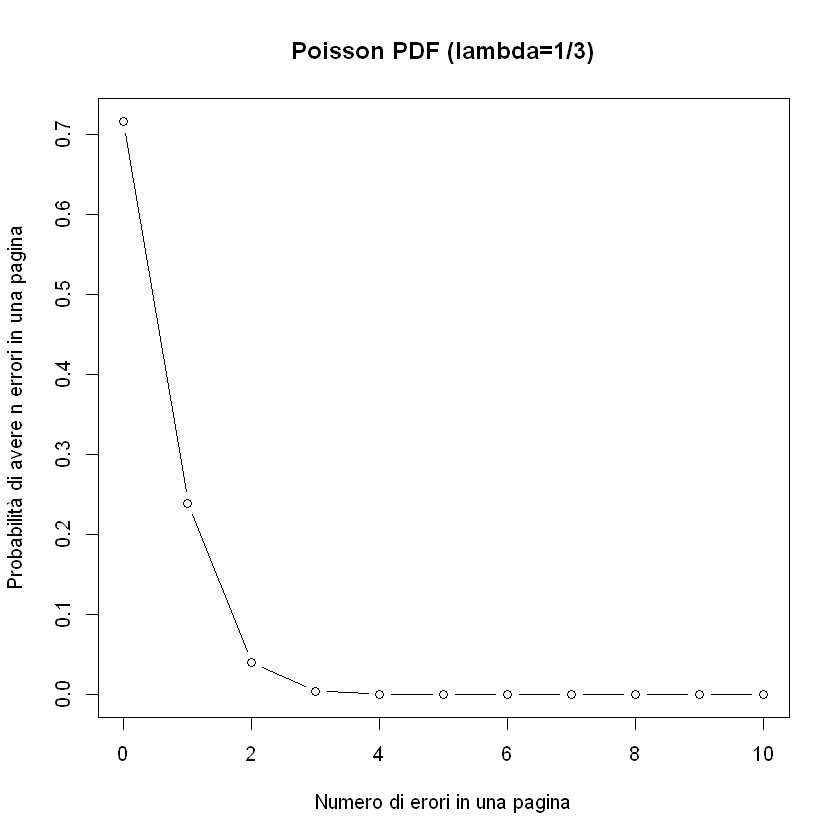

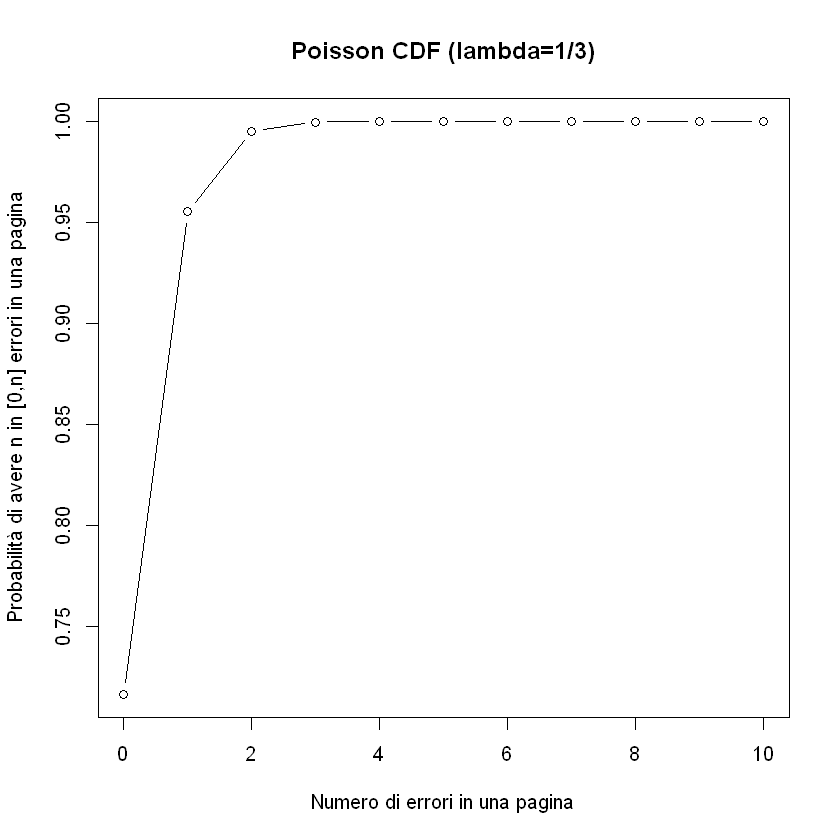

In [9]:
x <- 0:10
#scelgo un numero di eventi così piccolo in quanto per definzione la distribuzione discreta (ecco perchè 
# uso direttamente 1:5 con spazio di un'unità anzichè punti più fitti sempre in [1,5]) di Poisson vale per
# eventi che accadono raramente.

plot(x,dpois(x,lambda=1/3),main="Poisson PDF (lambda=1/3)", xlab="Numero di erori in una pagina",ylab="Probabilità di avere n errori in una pagina",type="b")
plot(x,ppois(x,lambda=1/3),main="Poisson CDF (lambda=1/3)", xlab="Numero di errori in una pagina",ylab="Probabilità di avere n in [0,n] errori in una pagina",type="b")

#### Probabilità che vi sia almeno un errore in una pagina 
Calcolare questa probabilità è analogo a considerare l'evento complementare. Sia l'evento $E$="trovare almeno un errore in una pagina", allora l'evento complementare $E_*$="trovare meno di un errore in una pagina" oppure essendo la distribuzione discreta "trovare zero errori in una pagina".
Sia $n$ la nostra random variable:
\begin{equation}
P(n\geq1) = 1-P(n<1) = 1-P(n=0) = 1-e^{-1/3}
\end{equation}

In [10]:
# utilizzo sia la funzione ppois che la definizione vista nella cella sopra

print(paste0("La probabilità che vi sia almeno un errore in una pagina è ",ppois(0,lambda=1/3,lower.tail=FALSE)))
print(paste0("La probabilità che vi sia almeno un errore in una pagina è ",1-ppois(0,lambda=1/3,lower.tail=TRUE)))
print(paste0("La probabilità che vi sia almeno un errore in una pagina è ",1-exp(-1/3)))

[1] "La probabilità che vi sia almeno un errore in una pagina è 0.283468689426211"
[1] "La probabilità che vi sia almeno un errore in una pagina è 0.283468689426211"
[1] "La probabilità che vi sia almeno un errore in una pagina è 0.283468689426211"


## Exercise 4

Si estraggono seguendo una distribuzione di probabilità uniforme delle carte da un mazzo di 52 carte con reinserimento fino a quando si osserva un asso. Qual è la probabilità che ci sia bisogno almeno di 10 estrazioni?
La probabilità di trovare un asso in n estrazioni è pari a:

\begin{equation}
f(X=n)=p(1−p)^n−1
\end{equation}

Mentre la probabilità di trovare un asso entro le prime n estrazioni vale:

\begin{equation}
F(X=n)=1−(1−p)^n
\end{equation}
Dove $F(x)$ è la cumulative distribution function associata alla distribuzione geometrica. Nel nostro caso vogliamo estrarre almeno n carte prima di trovare l'asso quindi cerchiamo $1-F(X=n)$

In [11]:
# l'estrazione di una carta dal mazzo di 52 segue la distribuzione geometrica. In questo caso chiediamo 
# quale sia la probabilità che siano estratte almeno nove carte prima di trovare un asso. Pertanto utilizzo
# la cumulative distribution function per x=9, p=1/52 e lower.tail=false

print(paste0("La probabilità che esca un asso dopo almeno dieci estrazioni è ",pgeom(9,prob=4/52,lower.tail=FALSE)))
print(paste0("La probabilità che esca un asso dopo almeno dieci estrazioni è ",(1-4/52)^10))

# ho confrontato la funzione base di R con la relazione vista nella cella precedente che riguarda 
# la cdf

[1] "La probabilità che esca un asso dopo almeno dieci estrazioni è 0.449137107141863"
[1] "La probabilità che esca un asso dopo almeno dieci estrazioni è 0.449137107141864"


## Exercise 5
Sia $t$ il tempo necessario in ore per completare il test TOLC-I, consideriamo che esso segua la seguente densità di probabilità:

\begin{equation}
f(t) = \left\{ \begin{array} \ c(t-1)(2-t) \quad 1 < t < 2 \\ 0 \quad \text{altrimenti} \end{array} \right. 
\end{equation}

- utilizzando la funzione integrate() determinare la costante di integrazione $c$;
- rappresentare la pdf e cdf tramite delle funzioni appositamente definite;
- valutare la probabilità che uno studente finisca il test attitudinale in più di 75 minuti e che impieghi rispettivamente 90 e 120 minuti.

#### Determinare la costante di integrazione 
Analiticamente nell'intervallo $t\in [1,2]$ l'integrale della funzione $f(t)$ deve restituire uno affinchè tale funzione possa rappresentare una distribuzione di probabilità:
\begin{equation}
\int_{-\infty}^{+\infty} f(t) \ \mathrm{d} t = 1
\end{equation}
Pertanto essendo la funzione definita unicamente nell'intervallo $[1,2]$ per la proprietà di linearità dell'integrale si può scrivere:

\begin{equation}
\int_{-\infty}^{+\infty} f(t) \ \mathrm{d} t =  \int_{1}^{2} f(t) \ \mathrm{d} t =
 \int_{1}^{2}c(t-1)(2-t) \ \mathrm{d} t  = \dots = c\frac{1}{6}
\end{equation}
Segue che la costante $c=6$. 
E' possibile confrontare questo risultato con quello numerico tramite la funzione di R "integrate()".

In [12]:
# definisco innanzitutto la funzione integranda cioè la pdf per casi 
pdf <- function(t) {ifelse((t > 1 & t < 2), (t-1)*(2-t), 0)}
integral <- integrate(pdf,1,2)
cat("Il valore dell'integrale calcolato numericamente è ",integral$value,"\n")
cat("Il valore dell'integrale calcolato analiticamente è ",1/6,"\n")
cat("L'errore commesso calcolando l'integrale numericamente rispetto al valore analitico è di circa",integral$abs.error, sep="\n")

Il valore dell'integrale calcolato numericamente è  0.1666667 
Il valore dell'integrale calcolato analiticamente è  0.1666667 
L'errore commesso calcolando l'integrale numericamente rispetto al valore analitico è di circa
1.850372e-15


#### PDF e CDF
Osserviamo che la funzione $f(t)$ è già una pdf quindi è necessario calcolare la cumulative distribution function (cdf). Per fare ciò possiamo integrare numericamente la pdf oppure scriverne la forma analitica a partire dalla pdf. Ricordiamo che per estrarre successivamente dei samples dalla pdf bisognerà restringere il campo al dominio in cui la pdf è monotona crescente dunque invertibile.

Analiticamente troviamo che la funzione integrale $F(t)$ della pdf vale:

\begin{equation}
F(t) = \left\{ \begin{array} \ 0 \quad t\leq1 \\ \int_{1}^{t} (18x-6x^2-12)\ \mathrm{d} x \quad 1 < t < 2 \\ 0 \quad \text{altrimenti} \end{array} \right. 
\end{equation}
Ovvero quando $t\in[1,2]$:
$$F(t) = 9t^2-2t^3-12t+5$$
Infatti per $t=2$ si trova $F(2)=1$ come volevasi dimostrare per costruzione essendo questo valore corrispondente alla probabilità totale nel dominio di definizione della pdf.

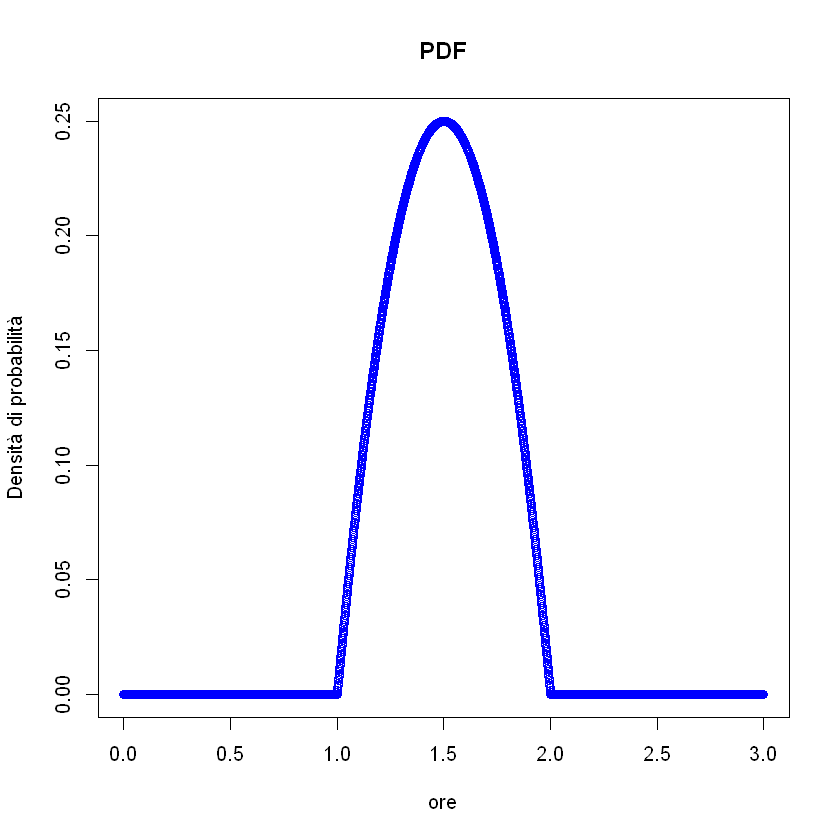

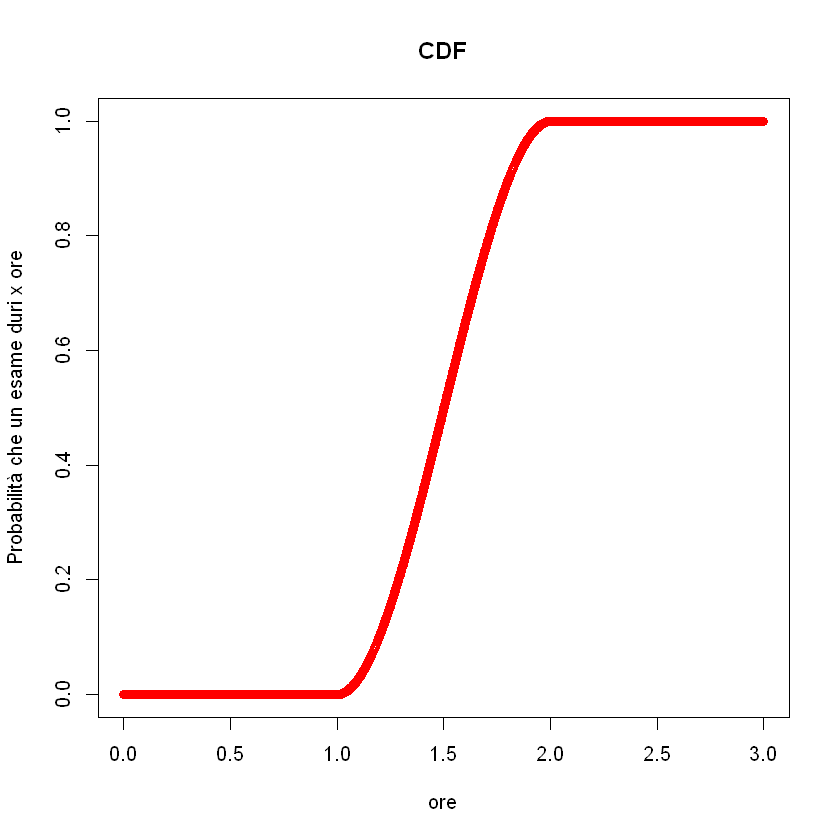

In [13]:
x <- seq(0,3,by=0.001)
# assegno al vettore x le ascisse utili a rappresentare la pdf e cdf 
cdf <- function(t, lower.tail=TRUE) {
    y <- ifelse((t <= 1), 0, ifelse((t >= 2), 1, -2*t^3 + 9*t^2 - 12*t + 5))
    # utilizzo il costrutto ifelse per rendere vettorizzato il controllo dell'if loop che altrimenti sarebbe
    # stato scalare 
    if (lower.tail == FALSE) {y <- (1 - y)}
    # in questo modo chiedo di valutare la probabilità dell'evento complementare dunque è come se anzichè 
    # considerare la cdf come la P(x<=x_0) stessi prendendo P(x>x_0)    
    return(y)
}

# posso definire la cdf anche integrando la pdf numericamente in questo modo 
cdf.num <- function(t,lower.tail=TRUE) {
    f <- function(t) {ifelse((t > 1 & t < 2), 6*(t-1)*(2-t), 0)}
    g <- Vectorize(function(z) {integrate(f, 1, z)$value})
    y <- ifelse((t <= 1), 0, ifelse((t >= 2),1,g(t)))
    if (lower.tail == FALSE) {y <- (1 - y)}
    return(y)
}

# adesso posso rappresentare la pdf e la cdf
plot(x,pdf(x), col="blue", xlab="ore",ylab="Densità di probabilità", main="PDF")
plot(x,cdf(x), col="red", xlab="ore",ylab="Probabilità che un esame duri x ore", main="CDF")

#### Random sampler e inversa della CDF (quantile function)
La funzione quantile consiste nel trovare quei valori dei samples $t$ tali che la probabilità che la random variable sia minore o uguale di essi sia $y$. Tale definizione corrisponde all'inversa della CDF. La CDF assume valori in $[0,1]$ per definizione di probabilità e in quest intervallo è definita monotona crescente pertanto invertibile.

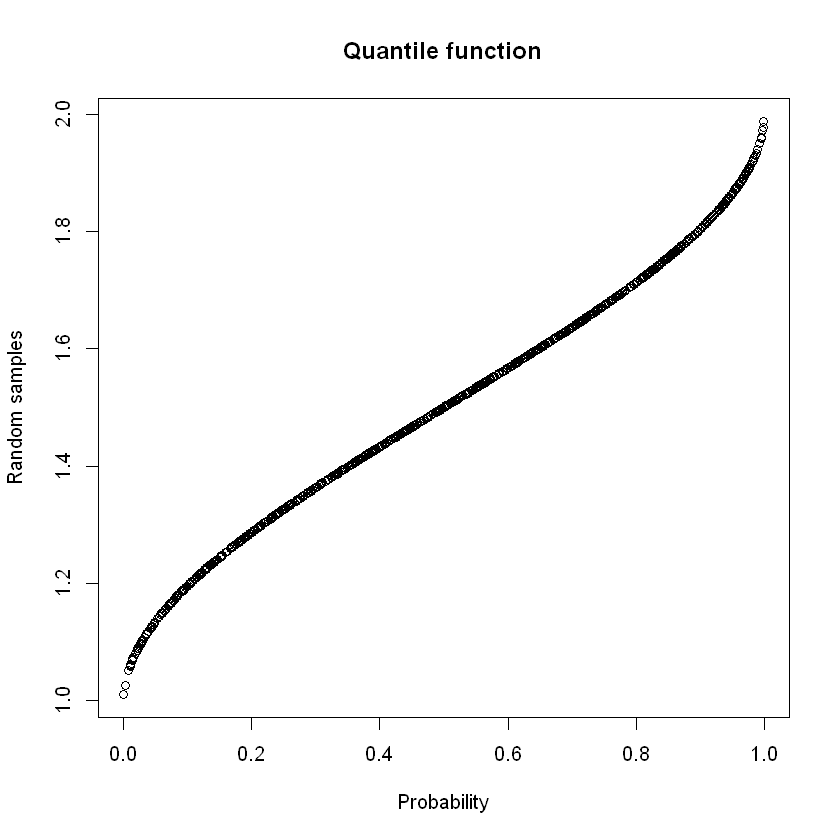

In [106]:
n = 1000
x = seq(1,2, length=n)
# se adesso dovessi avere come input di una funzione dei samples di y uniformemente distribuiti in [0,1] come potrei ricavare
# i corrispondenti valori di x?
# estraggo innanzitutto una probabilità uniformemente in [0,1]. Teoricamente dovrei andare a risolvere l'equazione f(x)=y per trovare x dove y
# è il valore che ho appena scelto con runif(1,min=0,max=1). Adesso noto il valore della cdf teorica dato da f(x) faccio in modo di scegliere 
# l'indice di x tale che la differenza f(x)-y sia la minima possibile in valore assoluto. In questa maniera è come se confrontassi uno ad uno 
# le probabilità presenti nel vettore f(x) e prendessi quella più vicina ad y, visto a quale indice corrisponde utilizzo lo stesso per 
# selezionare la x corrispondente che sarà il mio output 
qdf <- function(x) {
    x.out = c()
    y.out = c()
    y = cdf(x)
    for (i in seq(length(x))){
        y.in = runif(1,min=0,max=1)
        x.out[i] = x[which.min(abs(y-y.in))]
        y.out[i] = y.in
    }
    plot(y.out,x.out, main="Quantile function",xlab="Probability",ylab="Random samples")
}

qdf(x)

[1] 1.552553

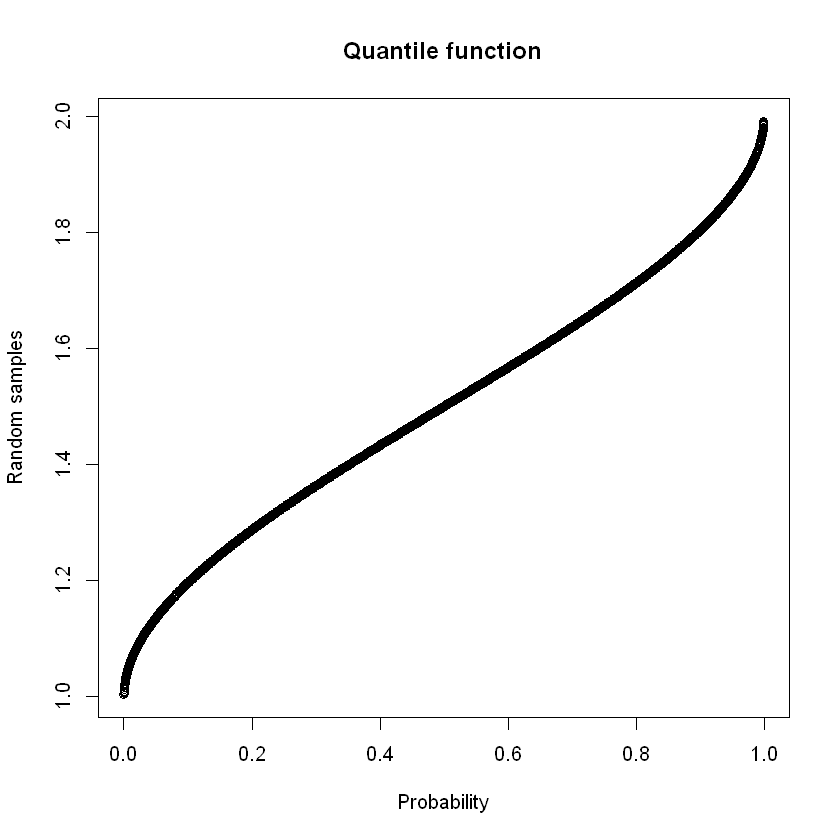

In [93]:
#per esempio do un punto generico y che sia estratto in [0,1]
y.in = runif(1,min=0,max=1)
#scelgo la x corrispondente che sia quella per cui y-y.in sia minimo
y = cdf(x)
x[which.min(abs(y-y.in))]
y.out = y.in
# ripeto n volte e plotto 
x.out = c()
y.out = c()
for (i in seq(10000)){
    y.in = runif(1,min=0,max=1)
    x.out[i] = x[which.min(abs(y-y.in))]
    y.out[i] = y.in
}
plot(y.out,x.out, main="Quantile function",xlab="Probability",ylab="Random samples")

In [14]:
#cdf.num1 <- function(t,lower.tail=TRUE) {
#    f <- function(t) {ifelse((t > 1 & t < 2), 6*(t-1)*(2-t), 0)}
#    if (t <= 1) {y <- 0}
#    if (t > 1 & t < 2) {y <- (integrate(f,1,t)$value)}
#    if (t >= 2) {y <- 1}
#    #if (lower.tail == FALSE) {y <- (1 - y)}
#    return(y)
#}

In [15]:
# posso verificare che le due funzioni cdf siano equivalenti confrontandone gli output 

if (all.equal(cdf(x),cdf.num(x))){print("L'integrazione numerica e analitica hanno restituito la stessa funzione integrale")}

[1] "L'integrazione numerica e analitica hanno restituito la stessa funzione integrale"


#### Probabilità che uno studente finisca il test in più di 75 minuti, che impieghi meno di 90 e 120 minuti
Nota la cdf $F(t)$ sfruttiamo la definizione:
$$P(X > x) = 1 - P(X \leq x) = 1 - F(X=x) $$
In questo caso $x=\frac{75}{60},\frac{90}{60},\frac{120}{60}$ essendo la random variable espressa in ore e non in minuti.
La probabilità che uno studente finisca in più di 75 minuti è dunque equivalente alla probabilità che non finisca entro 75 minuti, il discorso inverso vale per le altre due probabilità.

In [16]:
print(paste0("La probabilità che uno studente finisca in più di 75 minuti è ",cdf(75/60, lower.tail=FALSE)))
print(paste0("La probabilità che uno studente finisca in meno di 90 minuti è ",cdf(90/60)))
print(paste0("La probabilità che uno studente finisca in meno di 120 minuti è ",cdf(120/60)))

[1] "La probabilità che uno studente finisca in più di 75 minuti è 0.84375"
[1] "La probabilità che uno studente finisca in meno di 90 minuti è 0.5"
[1] "La probabilità che uno studente finisca in meno di 120 minuti è 1"


## Exercise 6 
La vita di uno pneumatico usato è $10^4 x \ km$ dove $x$ è una random variable che segue la distribuzione di probabilità: 


\begin{equation}
f(X) = \left\{ \begin{array} \ 2/x^2 \quad 1 < x < 2 \\ 0 \quad \text{altrimenti} \end{array} \right. 
\end{equation}

- scrivere il set di quattro equazioni che descrivono la pdf e cdf e rappresentarle;
- calcolare la probabilità che uno penumatico duri meno di $15000 km$
- estrarre 3000 samples dalla distribuzione e calcolare valor medio e varianza.

#### PDF e CDF

Analogamente a quanto visto prima scriviamo la funzione integrale $F(X)$, cdf della distribuzione di probabilità sopra definita.
Quest ultima è già normalizzata pertanto non dobbiamo preoccuparci di trovare l'opportuna costante di normalizzazione.

\begin{equation}
F(X)= \left\{ \begin{array} \ \int_{1}^{x} \frac{2}{t^2} \ \mathrm{d} t \quad 1 < x < 2 \\ 0 \quad \text{altrimenti} \end{array} \right.
\end{equation}

Quando $x \in [1,2]$ allora:
$$ F(X) = -\frac{2}{x} + 2 $$ 

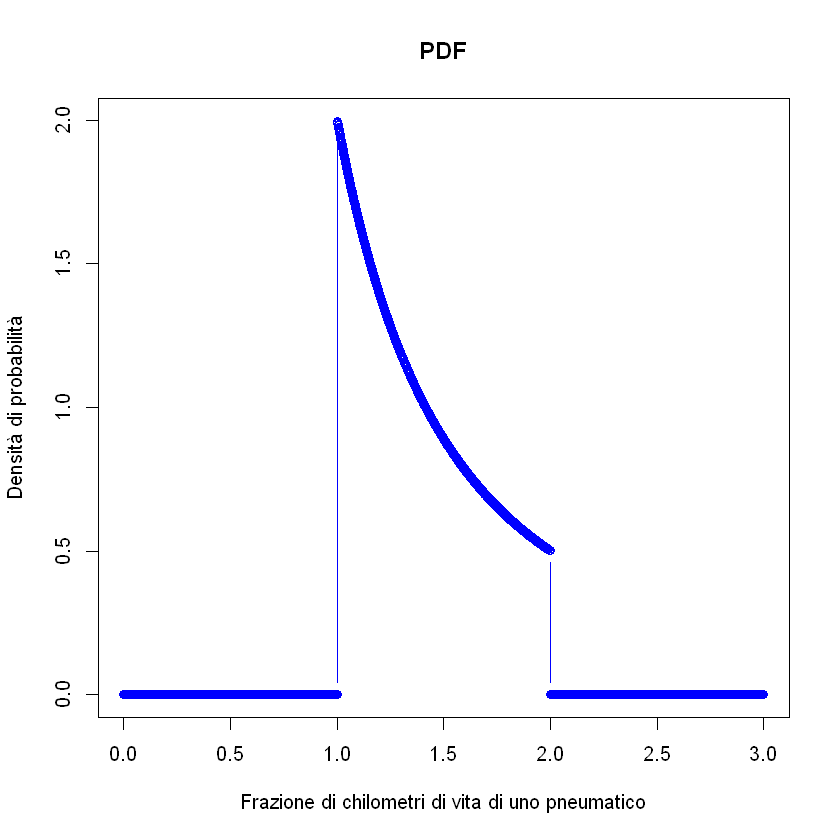

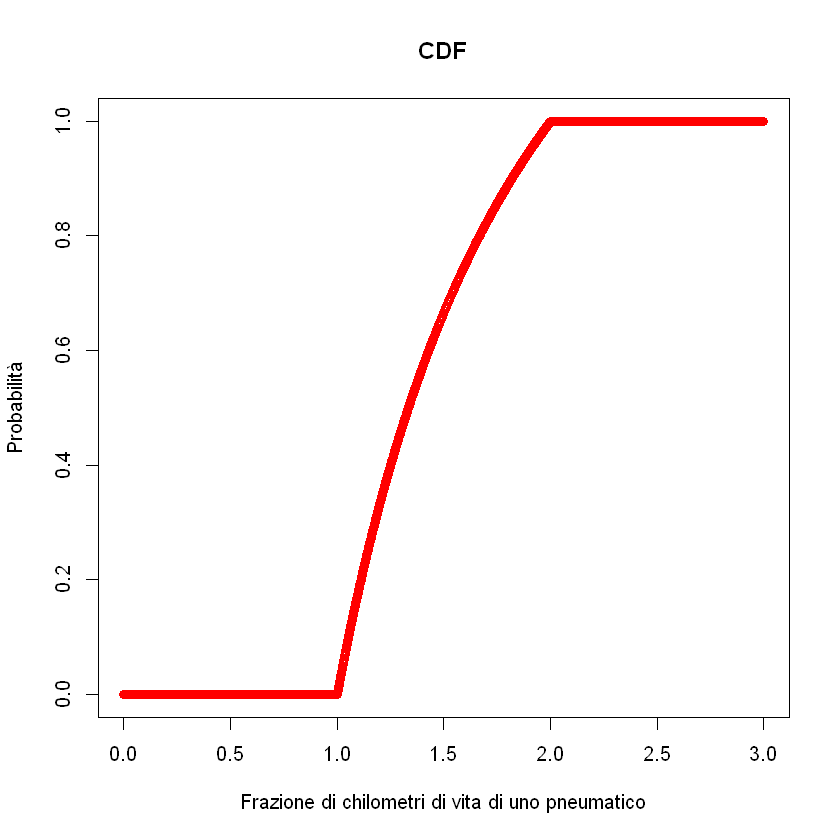

In [17]:
# definisco due funzioni f ed F 
dtire <- function (x, lower.tail = TRUE) {
    y <- ifelse((x > 1  & x < 2), 2/x^2, 0)
    if (lower.tail ==FALSE) {y <- (1-y)}
    return(y)
}

ptire <- function(x, lower.tail=TRUE) {
    y <- ifelse((x <= 1),0, ifelse((x >= 2),1,(-2/x)+2))
    if (lower.tail == FALSE) {y <- (1 - y)}
    return(y)
}

ptire.num<- function(x,lower.tail=TRUE) {
    f <- function(x) {ifelse((x > 1 & t < 2), 2/x^2, 0)}
    g <- Vectorize(function(z) {integrate(f, 1, z)$value})
    y <- ifelse((x <= 1), 0, ifelse((x >= 2),1,g(t)))
    if (lower.tail == FALSE) {y <- (1 - y)}
    return(y)
}

plot(x,dtire(x), type="b", col="blue",xlab="Frazione di chilometri di vita di uno pneumatico", ylab="Densità di probabilità", main="PDF")
plot(x,ptire(x), type="b", col="red",xlab="Frazione di chilometri di vita di uno pneumatico", ylab="Probabilità", main="CDF")
#plot(x,ptire.num(x), type="b", col="red",xlab="Frazione di chilometri di vita di uno pneumatico", ylab="Probabilità", main="CDF numerical")

#### Probabilità che uno pneumatico duri meno di $15000 \ \text{km}$ 
Possiamo utilizzare nuovamente la definizione della CDF e valutarla nel punto $x=1.5$

In [18]:
cat("La probabilità che uno pneumatico duri meno di 15000 km è", ptire(1.5))

La probabilità che uno pneumatico duri meno di 15000 km è 0.6666667

#### Estrazione di n samples dalla distribuzione di probabilità
Nota la forma analitica della CDF sfrutto il metodo dell'inverse sampling per estrarre gli n samples dalla distribuzione di probabilità $f(x)$.
Se $X$ è una random variable continua con CDF $F_X$ allora la variabile random $F_X$ ha una distribuzione uniforme in $[0,1]$. Invertendo la $F_X$ e dandole in pasto samples estratti randomicamente in $[0,1]$ il risultato sarebbero samples estratti dalla nostra distribuzione di partenza.

$$ F^{-1}(Y) = \frac{2}{2-y} \ \ \ \ \  ,y \neq 2,   y \in [0,1]$$ 

#### Valor atteso esatto dalla distribuzione:
\begin{equation}
\mathbb{E}(X) = \int_{-\infty}^{+\infty} x f(x) \ \mathrm{d} x =  \int_1^2 \frac{2}{x} \ \mathrm{d}x = \left[2\ln x\right]_1^2 \approx 1.386
\end{equation}
#### Varianza esatta:
\begin{equation}
\mathbb{E}(X^2) = \int_{-\infty}^{+\infty} x^2 f(x) \ \mathrm{d} x =  \int_1^2 2 \ \mathrm{d}x = 2 \left[x\right]_1^2 =  2
\end{equation}

\begin{equation}
\mathrm{Var}(X) = \mathbb{E}(X^2) - (\mathbb{E}(X))^2 = 2 - (\ln 4)^2 \approx 0.078
\end{equation}

In [19]:
y <- runif(3000)
uau <- function(d) 2/(2-d)
a <- uau(y)
#plot(a,y)
cat("Il valor medio è circa",mean(a),"\n")
cat("La varianza è circa",mean(a^2)-mean(a)^2)

Il valor medio è circa 1.381367 
La varianza è circa 0.07806205